In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import numpy.linalg
import scipy.io
import scipy.stats
import sklearn.metrics
import random

inNotebook = True # change this to True if you use a notebook
def nextplot():
    if inNotebook:
        plt.figure()  # this creates a new plot
    else:
        plt.clf()     # and this clears the current one

# Load the data

In [2]:
data = scipy.io.loadmat('/Users/hailianhou/Documents/3rd Semester/Hot Topics in Machine Learning/Assignment/html17-a1/data/spamData.mat')
X = data['Xtrain']
N = X.shape[0]
D = X.shape[1]
Xtest = data['Xtest']
Ntest = Xtest.shape[0]
y = data['ytrain'].squeeze().astype(int)
ytest = data['ytest'].squeeze().astype(int)

features = np.array([
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
    "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
    "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
    "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
    "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money",
    "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650",
    "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857",
    "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology",
    "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project",
    "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference",
    "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!",
    "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest",
    "capital_run_length_total" ])

# 1. Dataset Statistics

In [3]:
# look some dataset statistics
scipy.stats.describe(X)

DescribeResult(nobs=3065, minmax=(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.]), array([  4.54000000e+00,   1.42800000e+01,   5.10000000e+00,
         4.28100000e+01,   9.09000000e+00,   3.57000000e+00,
         7.27000000e+00,   1.11100000e+01,   3.33000000e+00,
         1.81800000e+01,   2.00000000e+00,   9.67000000e+00,
         5.55000000e+00,   5.55000000e+00,   2.86000000e+00,
         1.01600000e+01,   7.14000000e+00,   9.09000000e+00,
         1.87500000e+01,   6.32000000e+00,   1.11100000e+01,
         1.71000000e+01,   5.45000000e+00,   9.09000000e+00,
         2.00000000e+01,   1.42800000e+01,   3.33300000e+01,
         4.76000000e+00,   1.42800000e+01,   4.76000000e+00,
         4.76000000e+00,   4.76000

<IPython.core.display.Javascript object>


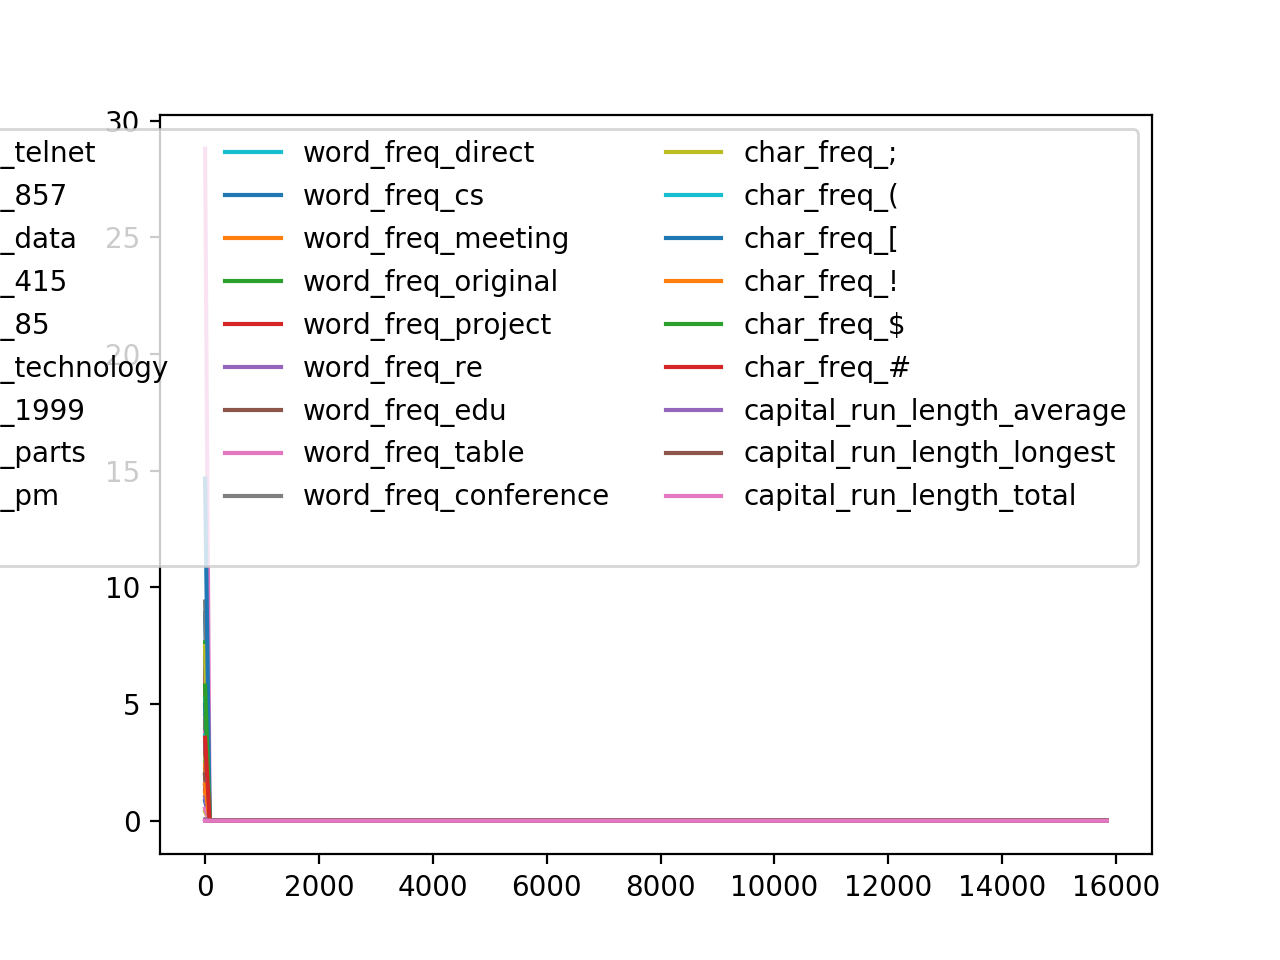

In [4]:
# plot the distribution of all features
nextplot()
densities = [ scipy.stats.gaussian_kde(X[:,j]) for j in range(D) ]
xs = np.linspace(0,np.max(X),200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend([
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
    "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
    "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
    "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
    "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money",
    "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650",
    "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857",
    "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology",
    "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project",
    "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference",
    "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!",
    "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest",
    "capital_run_length_total" ],ncol=6,)

<IPython.core.display.Javascript object>


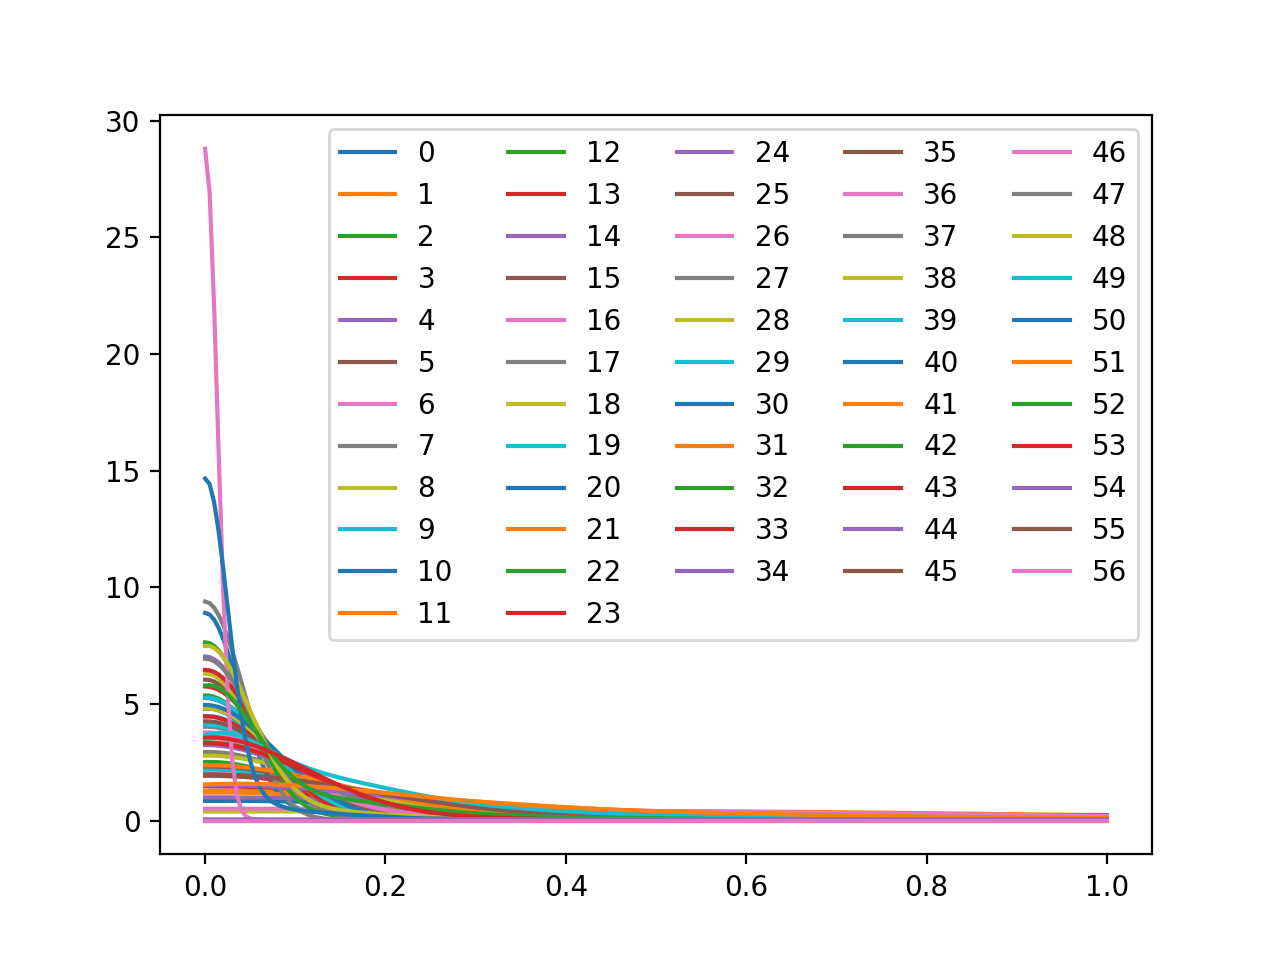

<IPython.core.display.Javascript object>


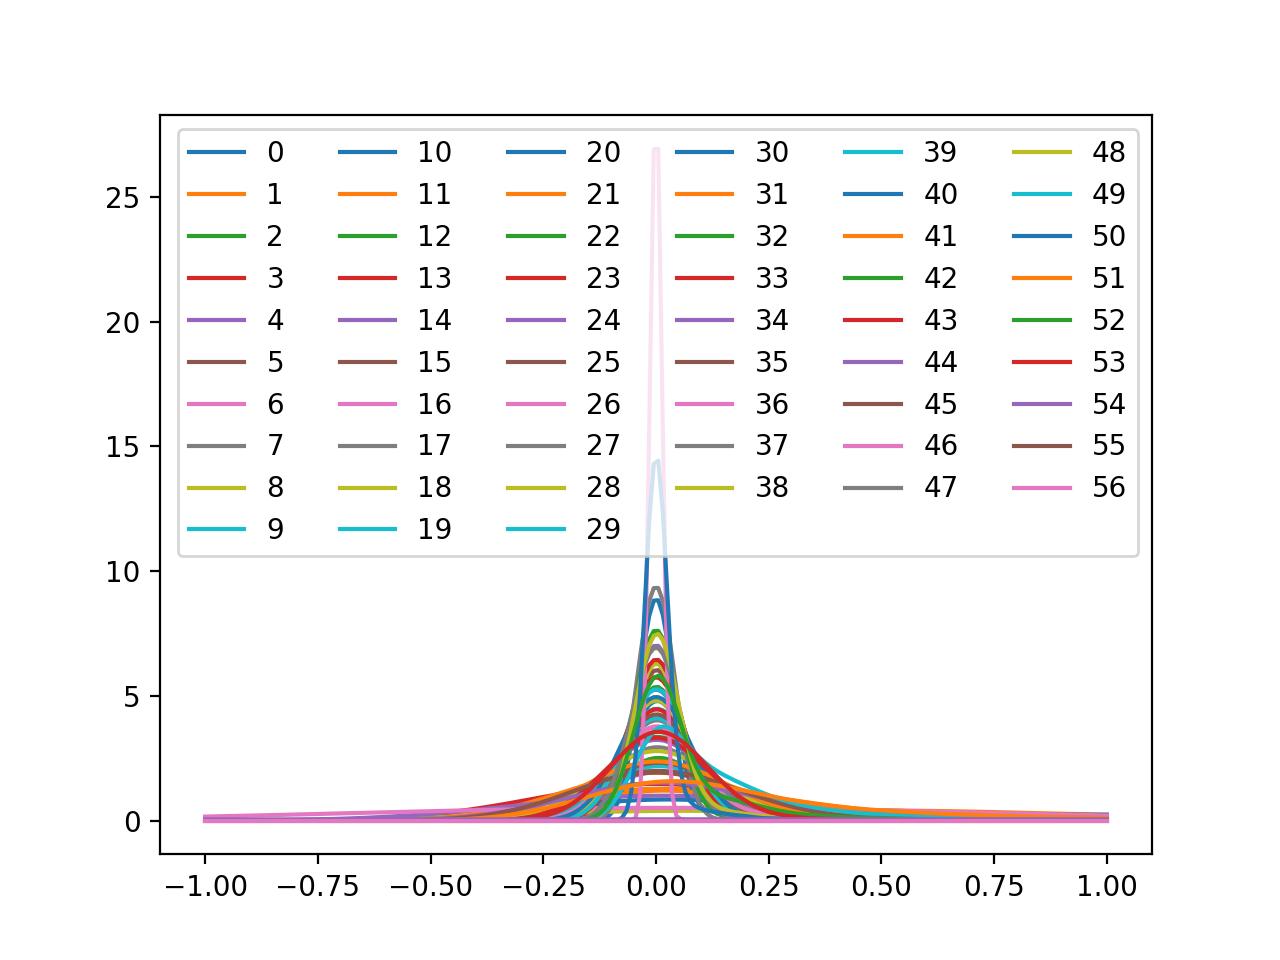

<IPython.core.display.Javascript object>


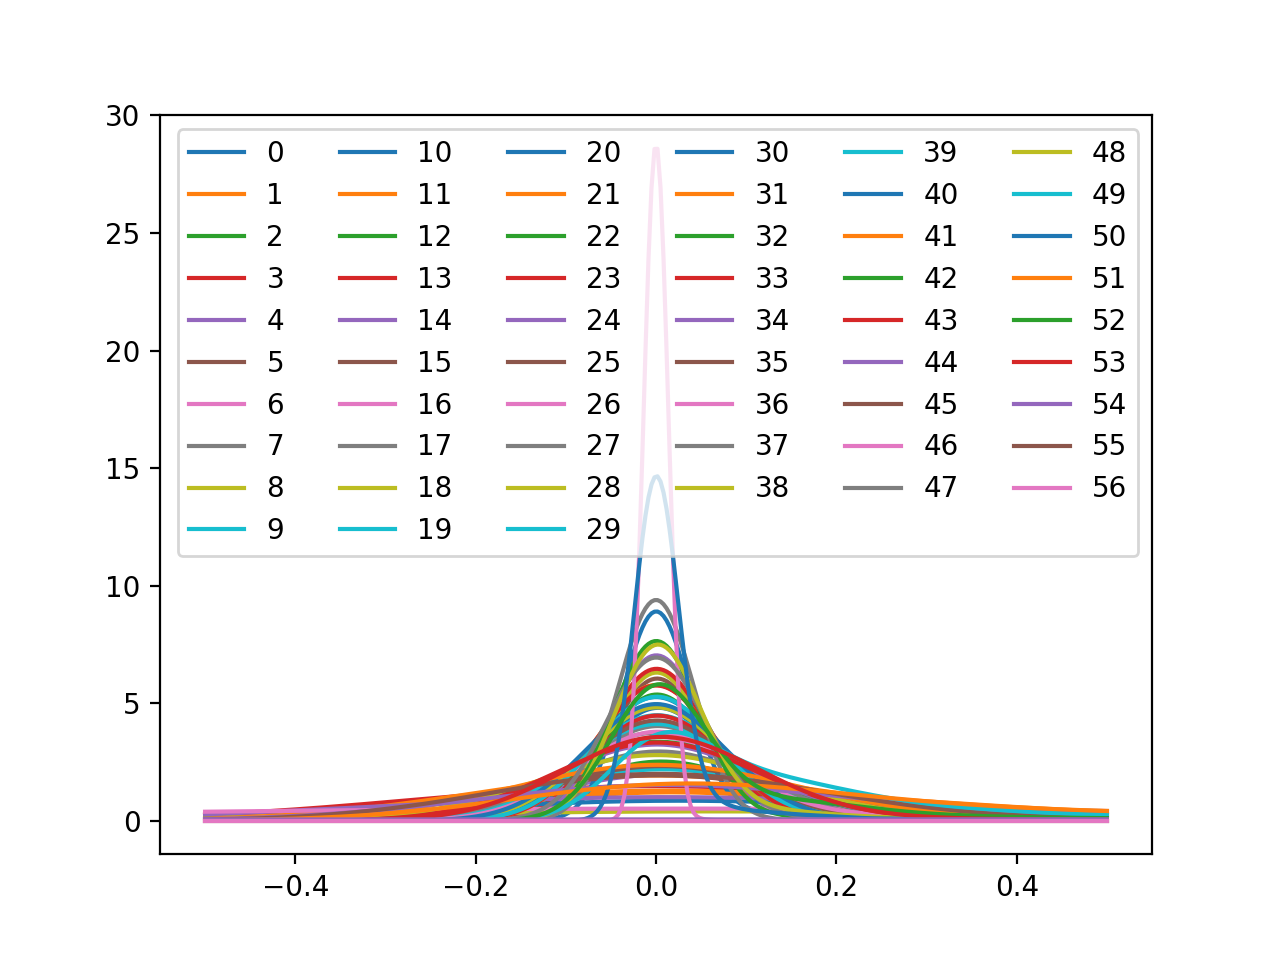

In [5]:
# this plots is not really helpful; go now explore further
# YOUR CODE HERE

#explore 1
nextplot()
densities = [ scipy.stats.gaussian_kde(X[:,j]) for j in range(D) ]
xs = np.linspace(0,1,200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)

#explore 2
nextplot()
densities = [ scipy.stats.gaussian_kde(X[:,j]) for j in range(D) ]
xs = np.linspace(-1,1,200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=6)

#explore 3
nextplot()
densities = [ scipy.stats.gaussian_kde(X[:,j]) for j in range(D) ]
xs = np.linspace(-0.5,0.5,300)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=6)

In [6]:
# Let's compute z-scores; create two new variables Xz and Xtestz.
def getZScore(data):
    def zScore(x,mean,std):
        zs=(x-mean)/std
        return zs
    matrix = [[zScore(data[i,j], np.mean(data[:,j]),np.std(data[:,j])) for i in range(data.shape[0])] for j in range(data.shape[1])] 
    array=np.array(matrix).reshape(-1, data.shape[0])
    array=np.transpose(array)
    return array

Xz=getZScore(X)
Xtestz=getZScore(Xtest)
print(np.mean(Xtest[:,1]))



0.182141927083


In [7]:
# Let's check. Xz and Xtestz refer to the normalized datasets just created. We
# will use them throughout.
a1= np.mean(Xz, axis=0)                       # should be all 0
a2= np.var(Xz, axis=0)                        # should be all 1
b1=np.mean(Xtestz, axis=0)                   # what do you get here? 0
b2=np.var(Xtestz, axis=0)                   #1

a3= np.sum(Xz**3)# should be: 1925261.15
b3=np.sum(Xtestz**3) #816370.63

print(a1,a2,a3,b1,b2,b3)

[  1.85459768e-17   9.27298839e-18  -5.56379304e-17  -9.27298839e-18
   5.56379304e-17   3.70919536e-17   0.00000000e+00  -7.41839072e-17
   5.56379304e-17   0.00000000e+00  -1.85459768e-17  -2.43415945e-17
  -4.63649420e-17   1.85459768e-17   1.85459768e-17   3.70919536e-17
  -3.70919536e-17  -9.27298839e-17  -1.66913791e-16   9.27298839e-18
   1.85459768e-17   9.27298839e-18  -5.56379304e-17  -1.85459768e-17
  -6.49109188e-17  -3.70919536e-17  -1.85459768e-17   1.85459768e-17
  -2.78189652e-17   4.63649420e-17  -1.85459768e-17   5.56379304e-17
   0.00000000e+00  -1.85459768e-17   3.70919536e-17   1.85459768e-17
  -9.27298839e-18   4.63649420e-18   1.85459768e-17   9.27298839e-18
   2.31824710e-17  -2.78189652e-17  -9.27298839e-18   4.63649420e-18
  -9.27298839e-18  -9.27298839e-18   1.39094826e-17  -2.78189652e-17
  -3.70919536e-17  -6.49109188e-17   4.63649420e-18   3.70919536e-17
  -3.70919536e-17   9.27298839e-18  -9.27298839e-18   9.27298839e-18
  -7.41839072e-17] [ 1.  1.  1.  1

<IPython.core.display.Javascript object>


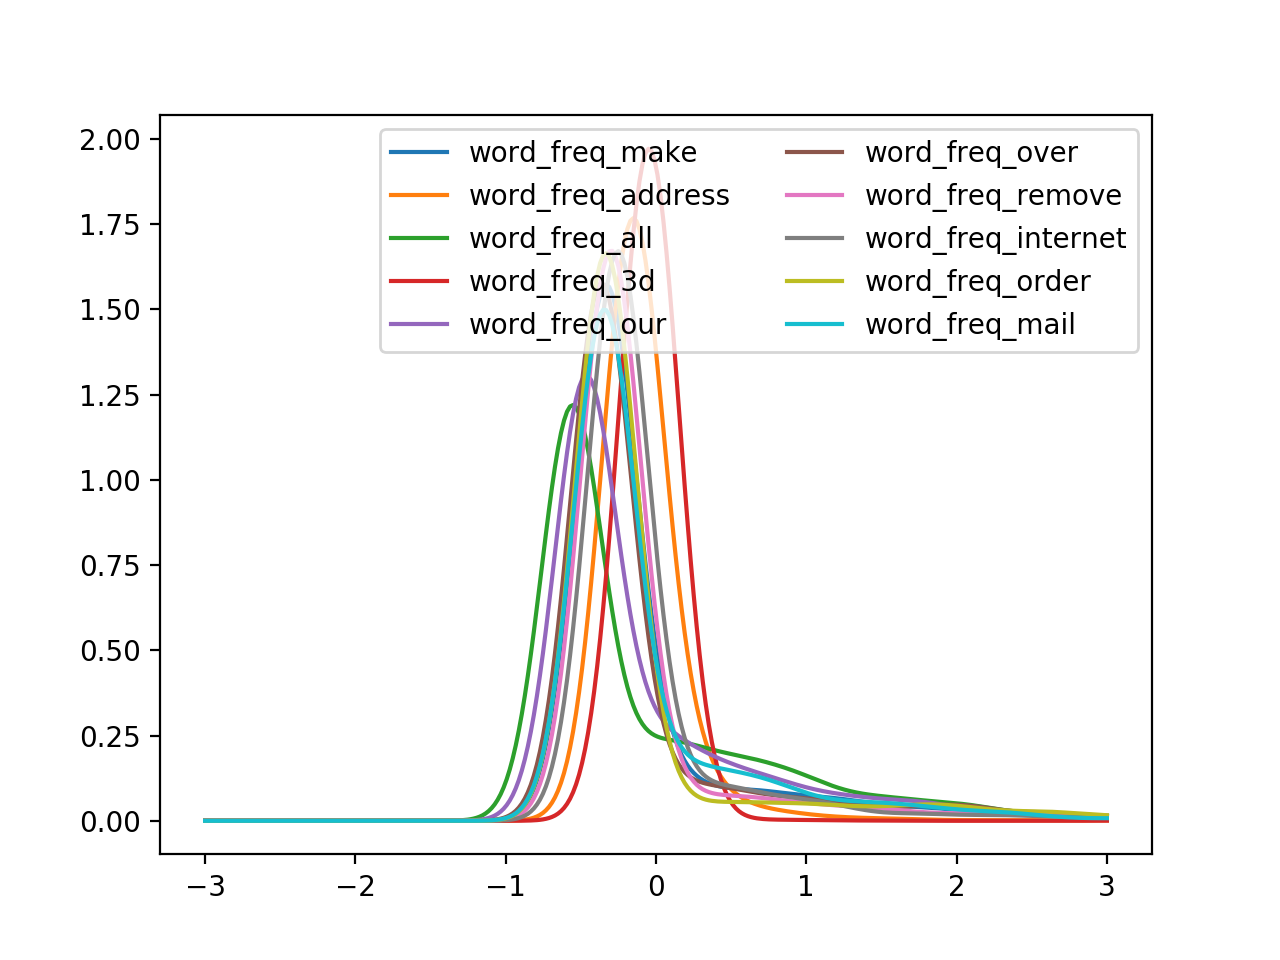

<IPython.core.display.Javascript object>


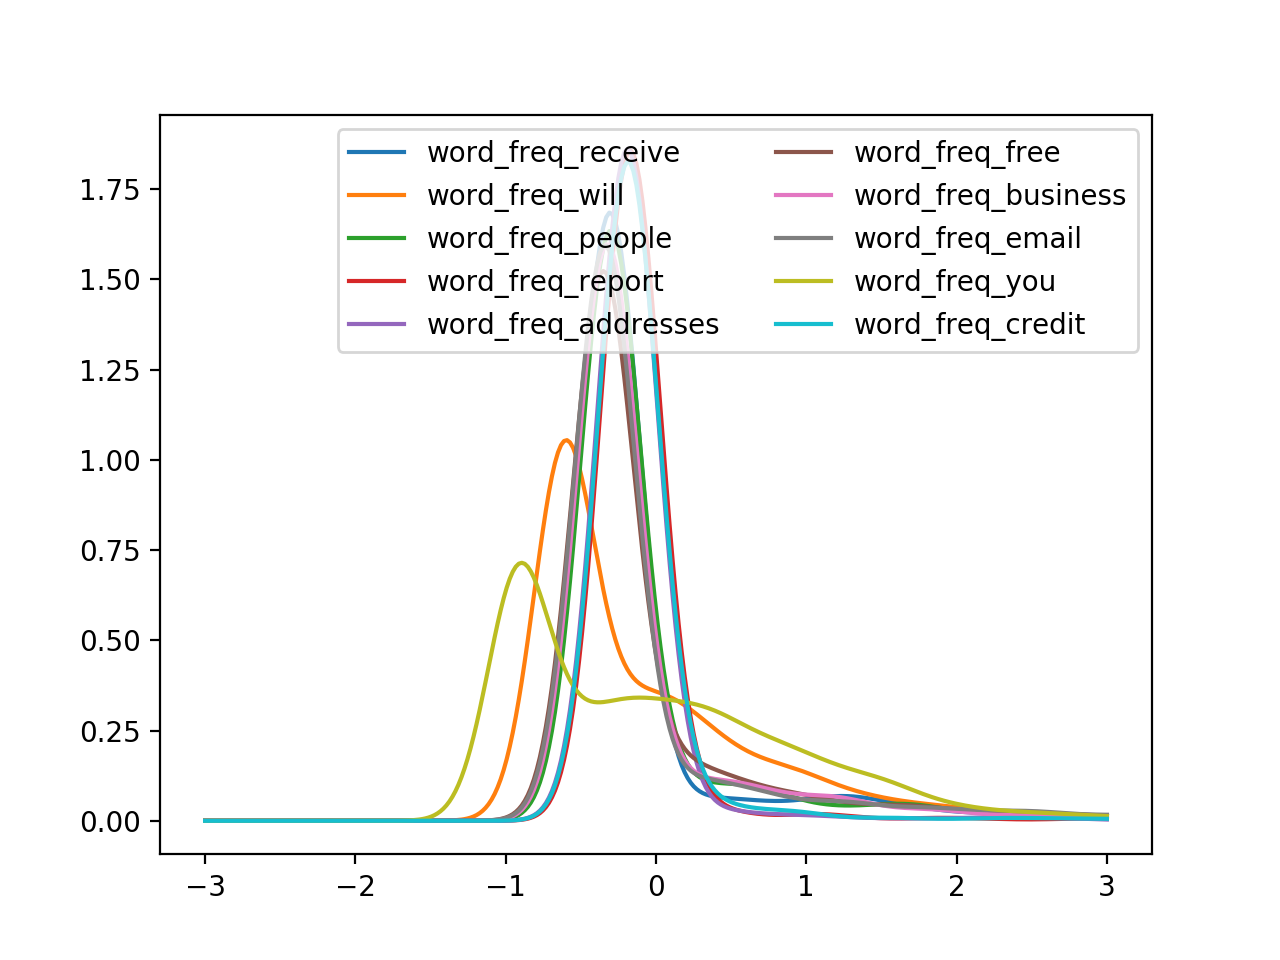

<IPython.core.display.Javascript object>


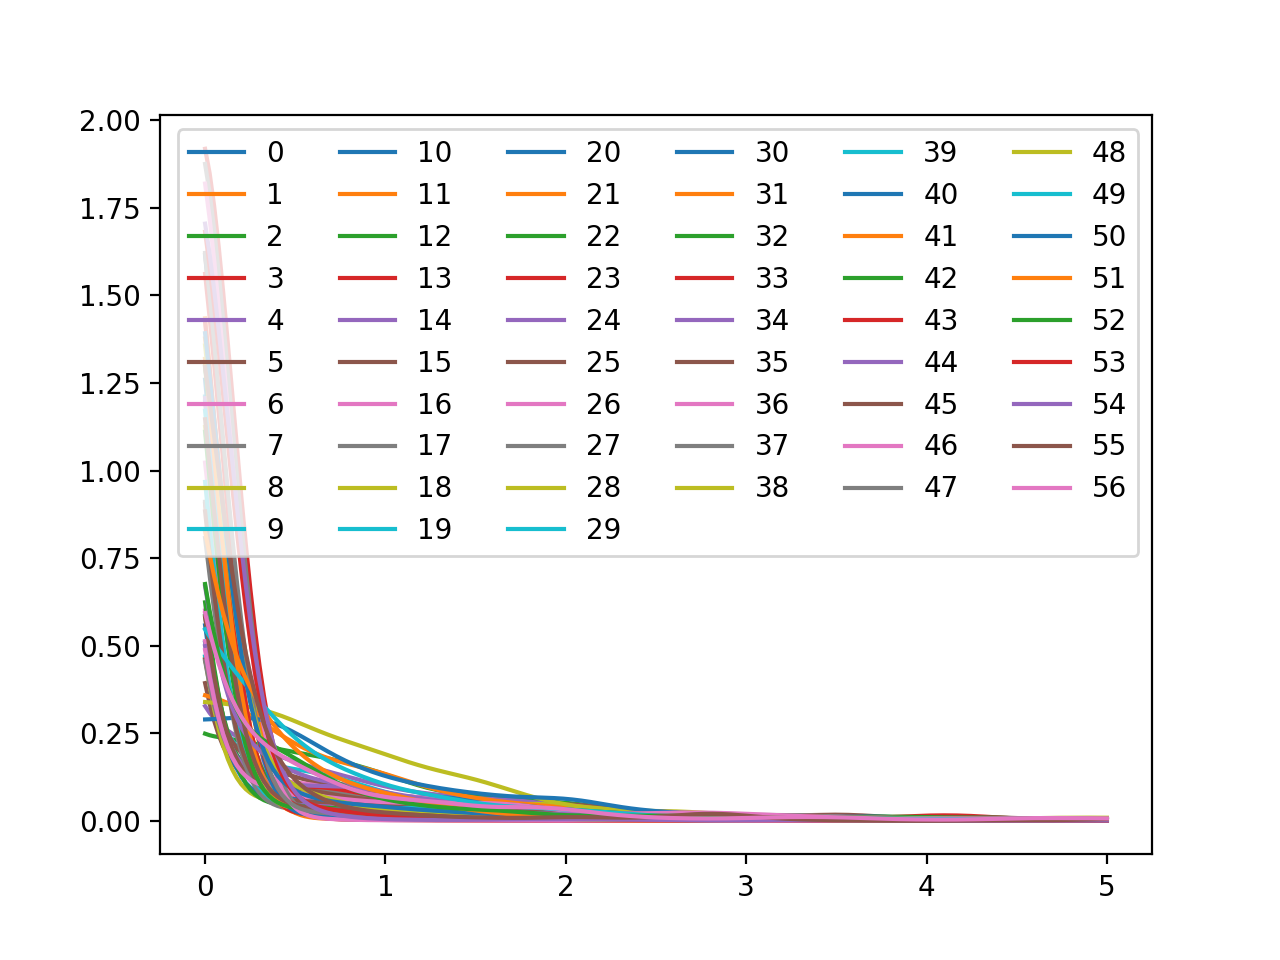

In [8]:
# Explore the normalized data
# YOUR CODE HERE

#explore 4 figure 5
nextplot()
densities = [ scipy.stats.gaussian_kde(Xz[:,j]) for j in range(10) ]
xs = np.linspace(-3,3,300)
for j in range(10):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend([
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
    "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
    "word_freq_order", "word_freq_mail"],ncol=2)

nextplot()
densities = [ scipy.stats.gaussian_kde(Xz[:,j]) for j in range(D) ]
xs = np.linspace(-3,3,300)
for j in range(10,20):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(["word_freq_receive", "word_freq_will",
    "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
    "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",],ncol=2)

#explore 5 figure 6
nextplot()
densities = [ scipy.stats.gaussian_kde(Xz[:,j]) for j in range(D) ]
xs = np.linspace(0,5,200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=6)

# 2. Maximum Likelihood Estimation

## Helper functions

In [9]:
def logsumexp(x):
    """Computes log(sum(exp(x)).

    Uses offset trick to reduce risk of numeric over- or underflow. When x is a
    1D ndarray, computes logsumexp of its entries. When x is a 2D ndarray,
    computes logsumexp of each row.

    Keyword arguments:
    x : a 1D or 2D ndarray
    """
    offset = np.max(x, axis=0)
    return offset + np.log(np.sum(np.exp(x-offset), axis=0))

In [10]:
# Define the logistic function. Make sure it operates on both scalars
# and vectors.

def sigma(x):
    if isinstance(x, np.ndarray):
        sig=[1 / (1 + np.exp(-i)) for i in x]
        array=np.array(sig)
        return array
    else:
        return 1 / (1 + np.exp(-x)) 
    

In [11]:
# this should give:
# [0.5, array([0.26894142, 0.5, 0.73105858])]
[sigma(0), sigma(np.array([-1,0,1])) ]


[0.5, array([ 0.26894142,  0.5       ,  0.73105858])]

In [12]:
# Define the logarithm of the logistic function. Make sure it operates on both
# scalars and vectors. Perhaps helpful: isinstance(x, np.ndarray).
def logsigma(x):
    # YOUR CODE HERE
    return np.log(sigma(x))


In [13]:
# this should give:
# [-0.69314718055994529, array([-1.31326169, -0.69314718, -0.31326169])]
[ logsigma(0), logsigma(np.array([-1,0,1])) ]

[-0.69314718055994529, array([-1.31326169, -0.69314718, -0.31326169])]

## 2b Log-likelihood and gradient

In [14]:
def l(y, X, w):
    """Log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.
    """
    # YOUR CODE HERE
    scores = np.dot(X, w)
    loglik = np.sum(y*scores - np.log(1 + np.exp(scores)))
    return loglik

In [15]:
# this should give:
# -47066.641667825766
l(y, Xz, np.linspace(-5,5,D))

-47066.641667825766

In [16]:
def dl(y,X,w):
    """Gradient of the log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.

    Returns
    -------
    ndarray of shape (D,)
    """
    # YOUR CODE HERE
    scores= np.dot(X,w)
    gloglik= np.dot((y-1/(1+np.exp(-scores))),X)
    return gloglik

In [17]:
# this should give:
# array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#          802.61217579,   795.96202907,   920.69045803,   621.96516752,
#          659.18724769,   470.81259805,   771.32406968,   352.40325626,
#          455.66972482,   234.36600888,   562.45454038,   864.83981264,
#          787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#         1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#         -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#         -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#         -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#         -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#         -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#         -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#         -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#          604.54173228,    43.10390907,   152.24258478,   378.16731033,
#          416.12032881])
dl(y, Xz, np.linspace(-5,5,D))

array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
         802.61217579,   795.96202907,   920.69045803,   621.96516752,
         659.18724769,   470.81259805,   771.32406968,   352.40325626,
         455.66972482,   234.36600888,   562.45454038,   864.83981264,
         787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
        1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
        -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
        -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
        -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
        -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
        -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
        -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
        -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
         604.54173228,    43.10390907,   152.24258478,   378.16731033,
      

## 2c Gradient descent

In [18]:
# you don't need to modify this function
def optimize(obj_up, theta0, nepochs=50, eps0=0.01):
    """Iteratively minimize a function.

    We use it here to run either gradient descent or stochastic gradient
    descent, using arbitrarly optimization criteria.

    Parameters
    ----------
    obj_up  : a tuple of form (f, update) containing two functions f and update.
              f(theta) computes the value of the objective function.
              update(theta,eps) performs a parameter update with step size eps
              and returns the result.
    theta0  : ndarray of shape (D,)
              Initial parameter vector.
    nepochs : int
              How many epochs (calls to update) to run.
    eps0    : float
              Initial step size.

    Returns
    -------
    A triple consisting of the fitted parameter vector, the values of the
    objective function after every epoch, and the step sizes that were used.
    """

    f, update = obj_up

    # initialize results
    theta = theta0
    values = np.zeros(nepochs+1)
    eps = np.zeros(nepochs+1)
    values[0] = f(theta0)
    eps[0] = eps0

    # now run the update function nepochs times
    for epoch in range(nepochs):
        print("Epoch {:3d}: f={:10.3f}, eps={:10.9f}".format(epoch, values[epoch], eps[epoch]))
        theta = update(theta, eps[epoch])

        # we use the bold driver heuristic
        values[epoch+1] = f(theta)  #get store the object function value of each epoch 
        if (values[epoch] < values[epoch+1]): #compare the new object function value with the former one
            eps[epoch+1] = eps[epoch]/2.
        else:
            eps[epoch+1] = eps[epoch]*1.05

    # all done
    print("Result after {} epochs: f={}".format(nepochs, values[-1]))
    return theta, values, eps

In [19]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with gradient descent (should
# return a tuple of two functions; see optimize)
def gd(y,X):
    # YOUR CODE HERE
    def update(theta, epoch):
        return theta+ epoch*dl(y,X,theta)
    def f(theta):
        return l(y,X,theta)*-1
    return f, update
        

In [20]:
# this should give
# [47066.641667825766,
#  array([  4.13777838e+01,  -1.56745627e+01,   5.75882538e+01,
#           1.14225143e+01,   5.54249703e+01,   5.99229049e+01,
#           7.11220141e+01,   4.84761728e+01,   5.78067289e+01,
#           4.54794720e+01,   7.14638492e+01,   1.51369386e+01,
#           3.36375739e+01,   2.15061217e+01,   5.78014255e+01,
#           6.72743066e+01,   7.00829312e+01,   5.29328088e+01,
#           6.16042473e+01,   5.50018510e+01,   8.94624817e+01,
#           2.74784480e+01,   8.51763599e+01,   5.60363965e+01,
#          -2.55865589e+01,  -1.53788213e+01,  -4.67015412e+01,
#          -2.50356570e+00,  -3.85357592e+00,  -2.21819155e+00,
#           3.32098671e+00,   3.86933390e+00,  -2.00309898e+01,
#           3.84684492e+00,  -2.19847927e-01,  -1.29775457e+00,
#          -1.28374302e+01,  -2.78303173e+00,  -5.61671182e+00,
#           1.73657121e+01,  -6.81197570e+00,  -1.20249002e+01,
#           2.65789491e+00,  -1.39557852e+01,  -2.01135653e+01,
#          -2.72134051e+01,  -9.45952961e-01,  -1.02239111e+01,
#           1.52794293e-04,  -5.18938123e-01,  -3.19717561e+00,
#           4.62953437e+01,   7.87893022e+01,   1.88618651e+01,
#           2.85195027e+01,   5.04698358e+01,   6.41240689e+01])
f, update = gd(y, Xz)
[ f(np.linspace(-5,5,D)),
  update(np.linspace(-5,-5,D), .1)] #I think the linespace should be np.linspace(-5,5,D)

[47066.641667825766,
 array([  4.13777838e+01,  -1.56745627e+01,   5.75882538e+01,
          1.14225143e+01,   5.54249703e+01,   5.99229049e+01,
          7.11220141e+01,   4.84761728e+01,   5.78067289e+01,
          4.54794720e+01,   7.14638492e+01,   1.51369386e+01,
          3.36375739e+01,   2.15061217e+01,   5.78014255e+01,
          6.72743066e+01,   7.00829312e+01,   5.29328088e+01,
          6.16042473e+01,   5.50018510e+01,   8.94624817e+01,
          2.74784480e+01,   8.51763599e+01,   5.60363965e+01,
         -2.55865589e+01,  -1.53788213e+01,  -4.67015412e+01,
         -2.50356570e+00,  -3.85357592e+00,  -2.21819155e+00,
          3.32098671e+00,   3.86933390e+00,  -2.00309898e+01,
          3.84684492e+00,  -2.19847927e-01,  -1.29775457e+00,
         -1.28374302e+01,  -2.78303173e+00,  -5.61671182e+00,
          1.73657121e+01,  -6.81197570e+00,  -1.20249002e+01,
          2.65789491e+00,  -1.39557852e+01,  -2.01135653e+01,
         -2.72134051e+01,  -9.45952961e-01,  -1.0

In [21]:
# you can run gradient descent!
numpy.random.seed(0)
w0 = np.random.normal(size=D)
wz_gd, vz_gd, ez_gd = optimize(gd(y,Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=  4216.957, eps=0.010500000
Epoch   2: f=  2657.519, eps=0.011025000
Epoch   3: f=  1926.135, eps=0.011576250
Epoch   4: f=  1449.495, eps=0.012155063
Epoch   5: f=  1207.529, eps=0.012762816
Epoch   6: f=  1052.489, eps=0.013400956
Epoch   7: f=   957.275, eps=0.014071004
Epoch   8: f=   899.610, eps=0.014774554
Epoch   9: f=   882.904, eps=0.015513282
Epoch  10: f=  1017.083, eps=0.007756641
Epoch  11: f=   840.760, eps=0.008144473
Epoch  12: f=   805.649, eps=0.008551697
Epoch  13: f=   822.108, eps=0.004275848
Epoch  14: f=   746.377, eps=0.004489641
Epoch  15: f=   735.803, eps=0.004714123
Epoch  16: f=   729.780, eps=0.004949829
Epoch  17: f=   724.467, eps=0.005197320
Epoch  18: f=   719.408, eps=0.005457186
Epoch  19: f=   714.564, eps=0.005730046
Epoch  20: f=   709.932, eps=0.006016548
Epoch  21: f=   705.514, eps=0.006317375
Epoch  22: f=   701.321, eps=0.006633244
Epoch  23: f=   697.373, eps=0.006964906
Epoch  24: f=   

<IPython.core.display.Javascript object>


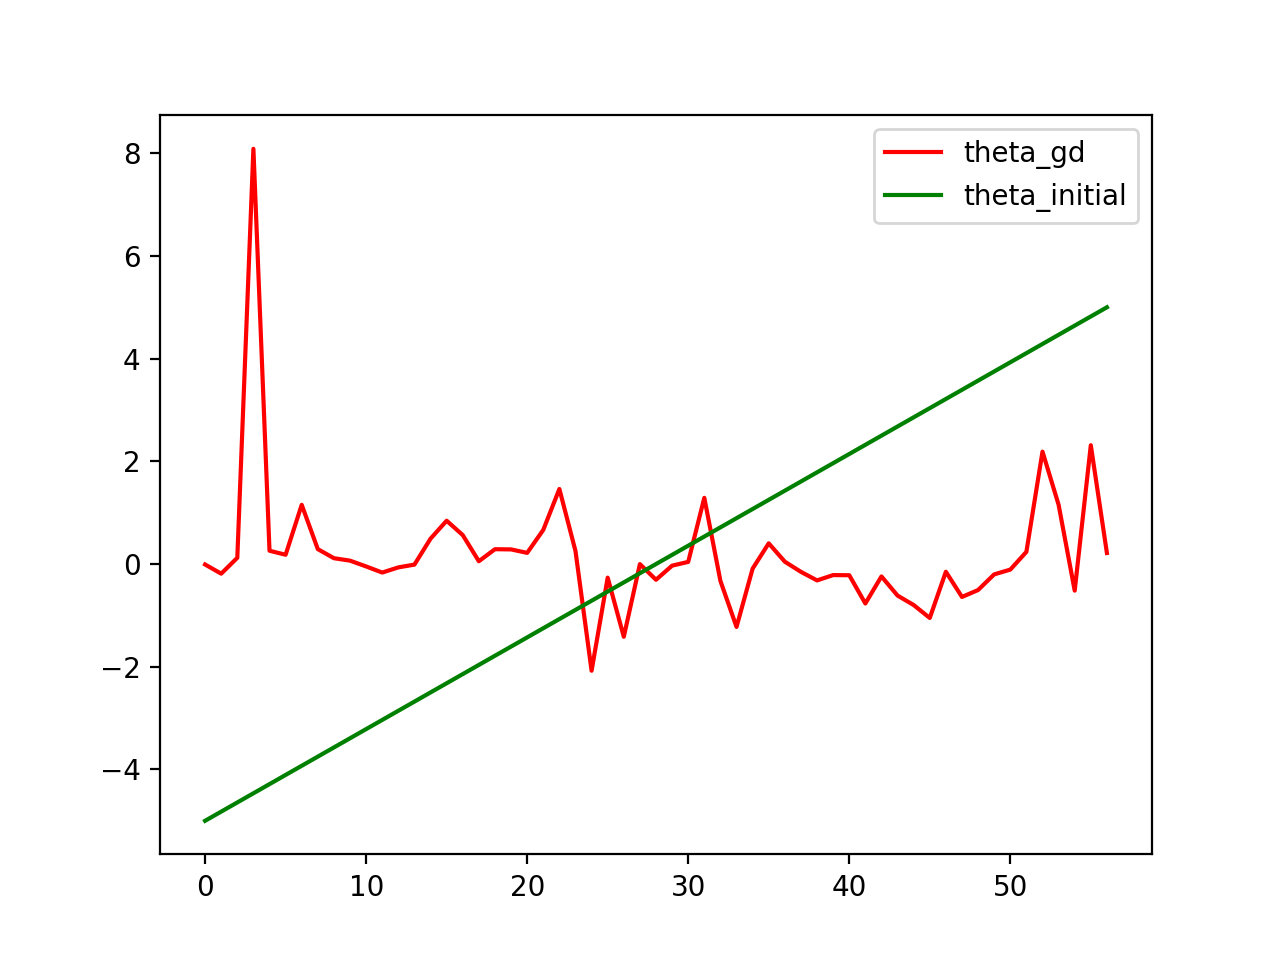

/Users/hailianhou/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [25]:
# look at how gradient descent made progess
# YOUR CODE HERE
nextplot()

plt.gca().set_color_cycle(['red', 'green', ])

xs=np.arange(57)
plt.plot(xs,wz_gd)
plt.plot(xs,np.array(np.linspace(-5,5,D)))
plt.legend(['theta_gd', 'theta_initial'], loc='upper right')
plt.show()

## 2d Stochastic gradient descent

In [36]:
def sgdepoch(y,X,w,eps):
    """Run one SGD epoch and return the updated weight vector. """
    # Run N stochastic gradient steps (without replacement). Do not rescale each
    # step by factor N (i.e., proceed differntly than in the lecture slides).
    # YOUR CODE HERE
    z=random.sample([0,len(X)-1],1)
    scores= np.dot(X[z],w)
    sg= np.dot((y[z]-1/(1+np.exp(-scores))),X[z])
    w=w+sg*eps
    return w

In [37]:
# when you run this multiple times, with 50% probability you should get the
# following result (there is one other result which is very close):
# array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#         -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#          5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#          5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#          7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#          1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#          8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#         -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#         -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#         -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#         -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#         -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#         -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#         -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#         -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#         -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#         -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#         -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#         -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])
sgdepoch(y[1:3],Xz[1:3,:],np.linspace(-5,5,D),1000)
# This result the random because the training example is randomly sampled

array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
        -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
         5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
         5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
         7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
         1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
         8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
        -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
        -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
        -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
        -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
        -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
        -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
        -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
        -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
        -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
        -1.57618226e+02,

In [38]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with stochastic gradient descent
# (should return a tuple of two functions; see optimize)
def sgd(y,X):
    # YOUR CODE HERE
    def update(theta, epoch):
        return sgdepoch(y,X,theta,epoch)
    def f(theta):
        return l(y,X,theta)*-1
    return f, update

In [39]:
# with 50% probability, you should get:
# [40.864973045695081,
#  array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#          -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#           5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#           5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#           7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#           1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#           8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#          -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#          -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#          -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#          -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#          -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#          -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#          -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#          -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#          -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#          -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#          -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#          -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])]
f, update = sgd(y[1:3], Xz[1:3,:])
[ f(np.linspace(-5,5,D)),
  update(np.linspace(-5,5,D), 1000) ]

[40.864973045695095,
 array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
         -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
          5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
          5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
          7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
          1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
          8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
         -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
         -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
         -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
         -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
         -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
         -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
         -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
         -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
         -1.95853348e+02,  -7.44868073e+01,  -1.1

In [40]:
# you can run stochastic gradient descent!
wz_sgd, vz_sgd, ez_sgd = optimize(sgd(y,Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=  6631.316, eps=0.010500000
Epoch   2: f=  6631.982, eps=0.005250000
Epoch   3: f=  6632.316, eps=0.002625000
Epoch   4: f=  6631.038, eps=0.002756250
Epoch   5: f=  6629.703, eps=0.002894063
Epoch   6: f=  6628.309, eps=0.003038766
Epoch   7: f=  6628.502, eps=0.001519383
Epoch   8: f=  6627.772, eps=0.001595352
Epoch   9: f=  6627.008, eps=0.001675120
Epoch  10: f=  6627.114, eps=0.000837560
Epoch  11: f=  6626.714, eps=0.000879438
Epoch  12: f=  6626.769, eps=0.000439719
Epoch  13: f=  6626.797, eps=0.000219859
Epoch  14: f=  6626.692, eps=0.000230852
Epoch  15: f=  6626.582, eps=0.000242395
Epoch  16: f=  6626.597, eps=0.000121198
Epoch  17: f=  6626.605, eps=0.000060599
Epoch  18: f=  6626.609, eps=0.000030299
Epoch  19: f=  6626.594, eps=0.000031814
Epoch  20: f=  6626.596, eps=0.000015907
Epoch  21: f=  6626.597, eps=0.000007954
Epoch  22: f=  6626.594, eps=0.000008351
Epoch  23: f=  6626.590, eps=0.000008769
Epoch  24: f=  6

## 2e Compare GD and SGD

<IPython.core.display.Javascript object>


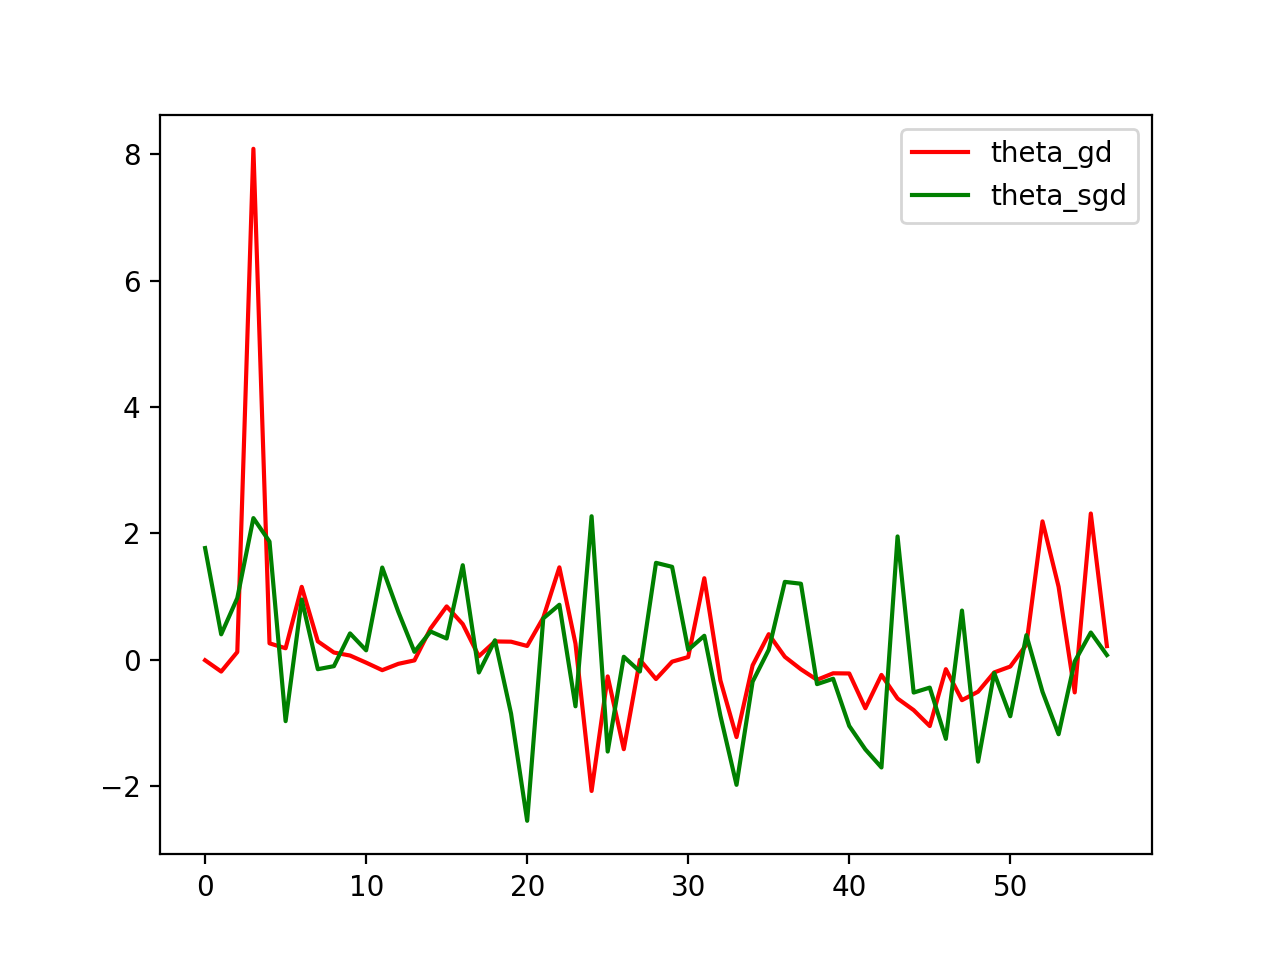

/Users/hailianhou/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [41]:
# YOUR CODE HERE
nextplot()
plt.gca().set_color_cycle(['red', 'green', ])
xs=np.arange(D)
plt.plot(xs,wz_gd)
plt.plot(xs,wz_sgd)
plt.legend(['theta_gd', 'theta_sgd'], loc='upper right')
plt.show()

# 3 Prediction

In [42]:
def predict(Xtest, w):
    """Returns vector of predicted confidence values for logistic regression with
weight vector w."""
    # YOUR CODE HERE
    return np.dot(Xtest, w)

def classify(Xtest, w):
    """Returns 0/1 vector of predicted class labels for logistic regression with
weight vector w."""
    # YOUR CODE HERE
    pred=list()
    for x in sigma(predict(Xtest,w)):
        if x>0.5:
            pred.append(1)
        else:
            pred.append(0)
    return np.array(pred)
            


In [56]:
print(wz_gd)
print("max weight index:", np.argmax(wz_gd), "max weight vaule:", wz_gd[np.argmax(wz_gd)])
print("min weight index:", np.argmin(wz_gd), "min weight vaule:", wz_gd[np.argmin(wz_gd)])
for i in range(len(wz_gd)):
    if wz_gd[i]<0.1 and wz_gd[i]>-0.1:
        print("not important weight index:", i, "value:", wz_gd[i])

[ -8.86805803e-03  -1.87711722e-01   1.21527679e-01   8.08625721e+00
   2.59086182e-01   1.81011961e-01   1.15333583e+00   2.90298799e-01
   1.13527420e-01   6.60449223e-02  -4.68398587e-02  -1.65669222e-01
  -6.53149090e-02  -1.09479222e-02   4.94021994e-01   8.43700154e-01
   5.63710277e-01   5.46097770e-02   2.89015689e-01   2.84882797e-01
   2.17373273e-01   6.64971958e-01   1.46174692e+00   2.54294549e-01
  -2.07767632e+00  -2.64575174e-01  -1.41614626e+00  -1.47368318e-03
  -3.06163147e-01  -3.12258163e-02   4.18300416e-02   1.28949980e+00
  -3.28686051e-01  -1.22486766e+00  -8.94396839e-02   4.03419808e-01
   4.58896319e-02  -1.52073801e-01  -3.18849236e-01  -2.15088329e-01
  -2.17999766e-01  -7.68176094e-01  -2.41103469e-01  -6.14325300e-01
  -7.98221834e-01  -1.05010623e+00  -1.49903381e-01  -6.40578227e-01
  -5.06152873e-01  -2.01326929e-01  -1.08442215e-01   2.37141619e-01
   2.18926566e+00   1.15453951e+00  -5.17771557e-01   2.31366068e+00
   2.14950198e-01]
max weight inde

In [43]:
# Example: confusion matrix
yhat = predict(Xtestz, wz_gd)
ypred = classify(Xtestz, wz_gd)
print( sklearn.metrics.classification_report(ytest, ypred) )

             precision    recall  f1-score   support

          0       0.91      0.93      0.92       941
          1       0.89      0.85      0.87       595

avg / total       0.90      0.90      0.90      1536



<IPython.core.display.Javascript object>


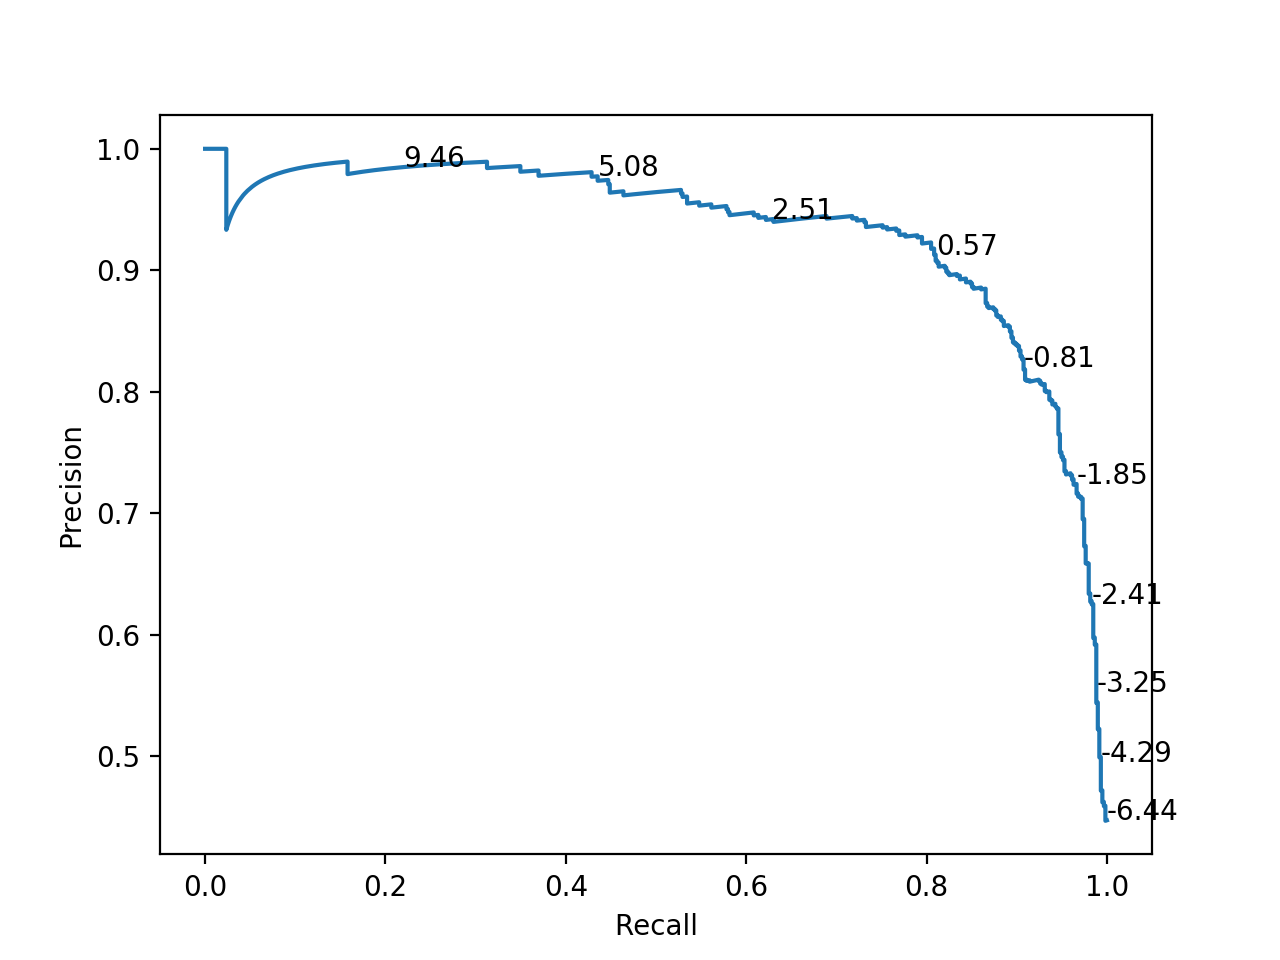

In [44]:
# Example: precision-recall curve (with annotated thresholds)
nextplot()
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(ytest, yhat)
plt.plot(recall, precision)
for x in np.linspace(0,1,10,endpoint=False):
    index = int(x * (precision.size-1))
    plt.text(recall[index], precision[index], "{:3.2f}".format(thresholds[index]))
plt.xlabel("Recall")
plt.ylabel("Precision")

# 4 Maximum Aposteriori Estimation

## 4a Gradient Descent

In [35]:
def l_l2(y,X,w,lambda_):
    """Log-density of posterior of logistic regression with weights w and L2
regularization parameter lambda_"""
    # YOUR CODE HERE
    p=np.sum(lambda_/2*(w**2))
    m=l(y,X,w)-p
    return m

In [36]:
# this should give:
# [-47066.641667825766, -47312.623810682911]
[ l_l2(y, Xz, np.linspace(-5,5,D),0), l_l2(y, Xz, np.linspace(-5,5,D),1) ]

[-47066.641667825766, -47312.623810682911]

In [37]:
def dl_l2(y,X,w,lambda_):
    """Gradient of log-density of posterior of logistic regression with weights w
and L2 regularization parameter lambda_."""
    # YOUR CODE HERE          
    return dl(y,X,w)-lambda_*w
  

In [38]:
# this should give:
# [array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#           802.61217579,   795.96202907,   920.69045803,   621.96516752,
#           659.18724769,   470.81259805,   771.32406968,   352.40325626,
#           455.66972482,   234.36600888,   562.45454038,   864.83981264,
#           787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#          1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#          -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#          -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#          -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#          -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#          -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#          -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#          -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#           604.54173228,    43.10390907,   152.24258478,   378.16731033,
#           416.12032881]),
#  array([  556.33985842,   148.66259175,   846.4765932 ,   161.33666149,
#           806.89789007,   800.06917193,   924.61902946,   625.71516752,
#           662.75867626,   474.20545519,   774.5383554 ,   355.43897054,
#           458.52686767,   237.04458031,   564.95454038,   867.16124121,
#           789.34009417,   651.44470748,   904.43352968,   545.61254171,
#          1176.21495178,   121.6098967 ,   840.68284529,   634.19739158,
#          -705.95386516,  -629.66826731,  -568.98799574,  -527.33139555,
#          -359.53701083,  -476.82191975,  -411.9633475 ,  -375.65522015,
#          -346.08624261,  -377.11329972,  -408.38904835,  -457.48251936,
#          -598.29817327,  -109.57786641,  -396.60741472,  -231.14554169,
#          -290.60642261,  -364.45545242,  -453.37896465,  -279.71789819,
#          -417.85007654,  -455.32343122,  -170.76077664,  -274.29723194,
#          -255.77283808,  -361.47497343,  -263.05325885,   414.25224198,
#           600.25601799,    38.63962335,   147.59972763,   373.34588176,
#           411.12032881])]
[ dl_l2(y, Xz, np.linspace(-5,5,D),0), dl_l2(y, Xz, np.linspace(-5,5,D),1) ]

[array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
          802.61217579,   795.96202907,   920.69045803,   621.96516752,
          659.18724769,   470.81259805,   771.32406968,   352.40325626,
          455.66972482,   234.36600888,   562.45454038,   864.83981264,
          787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
         1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
         -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
         -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
         -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
         -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
         -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
         -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
         -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
          604.54173228,    43.10390907,   152.24258478,   378.16

In [39]:
# now define the (f,update) tuple for optimize for logistic regression, L2
# regularization, and gradient descent
def gd_l2(y,X,lambda_):
    # YOUR CODE HERE
    def update(theta, epoch):
        return theta+ epoch*dl_l2(y,X,theta,lambda_)
    def f(theta):
        return l_l2(y,X,theta,lambda_)*-1
    return f, update
    

In [40]:
# let's run!
lambda_ = 100
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y,Xz,lambda_), w0, nepochs=500)

Epoch   0: f=  9992.358, eps=0.010000000
Epoch   1: f= 23977.384, eps=0.005000000
Epoch   2: f=  5534.851, eps=0.005250000
Epoch   3: f=  1427.453, eps=0.005512500
Epoch   4: f=  1131.716, eps=0.005788125
Epoch   5: f=  1540.933, eps=0.002894063
Epoch   6: f=  1323.168, eps=0.003038766
Epoch   7: f=  1049.068, eps=0.003190704
Epoch   8: f=  1067.960, eps=0.001595352
Epoch   9: f=   989.861, eps=0.001675120
Epoch  10: f=   988.742, eps=0.001758876
Epoch  11: f=   988.585, eps=0.001846819
Epoch  12: f=   988.539, eps=0.001939160
Epoch  13: f=   988.522, eps=0.002036118
Epoch  14: f=   988.516, eps=0.002137924
Epoch  15: f=   988.513, eps=0.002244820
Epoch  16: f=   988.512, eps=0.002357061
Epoch  17: f=   988.512, eps=0.002474914
Epoch  18: f=   988.512, eps=0.002598660
Epoch  19: f=   988.512, eps=0.002728593
Epoch  20: f=   988.512, eps=0.002865023
Epoch  21: f=   988.512, eps=0.003008274
Epoch  22: f=   988.512, eps=0.003158688
Epoch  23: f=   988.512, eps=0.003316622
Epoch  24: f=   

## 4b Effect of Prior

In [31]:
# YOUR CODE HERE
### set lambda as 0, 50, 100, 200, 500, and check the loglikelihood for training/test data and generate the weight vector
### then use the weight vector wz_gd_l2 to get the confusion matrix 

lambda_ = 0

#explore 1 for training data
#wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y,Xz,lambda_), w0, nepochs=500) # f=655.432

#get confusion matrix
yhat = predict(Xtestz, wz_gd_l2)
ypred = classify(Xtestz, wz_gd_l2)
print( sklearn.metrics.classification_report(ytest, ypred) )
print(sklearn.metrics.accuracy_score(ytest, ypred))

#explore 1 for test data
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(ytest,Xtestz,lambda_), w0, nepochs=500) # f=316.165


NameError: name 'predict' is not defined

In [42]:
#explore 2 for training data
lambda_ = 50

wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y,Xz,lambda_), w0, nepochs=500) # f=893.111

#get confusion matrix
yhat = predict(Xtestz, wz_gd_l2)
ypred = classify(Xtestz, wz_gd_l2)
print( sklearn.metrics.classification_report(ytest, ypred) )
print(sklearn.metrics.accuracy_score(ytest, ypred))

#explore 2 for test data
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(ytest,Xtestz,lambda_), w0, nepochs=500) # f=514.935




Epoch   0: f=  8314.283, eps=0.010000000
Epoch   1: f= 12897.822, eps=0.005000000
Epoch   2: f=  6565.719, eps=0.005250000
Epoch   3: f=  3240.685, eps=0.005512500
Epoch   4: f=  1644.695, eps=0.005788125
Epoch   5: f=  1078.731, eps=0.006077531
Epoch   6: f=   930.466, eps=0.006381408
Epoch   7: f=   936.670, eps=0.003190704
Epoch   8: f=   923.576, eps=0.003350239
Epoch   9: f=   910.938, eps=0.003517751
Epoch  10: f=   916.875, eps=0.001758876
Epoch  11: f=   893.772, eps=0.001846819
Epoch  12: f=   893.411, eps=0.001939160
Epoch  13: f=   893.310, eps=0.002036118
Epoch  14: f=   893.249, eps=0.002137924
Epoch  15: f=   893.207, eps=0.002244820
Epoch  16: f=   893.178, eps=0.002357061
Epoch  17: f=   893.158, eps=0.002474914
Epoch  18: f=   893.144, eps=0.002598660
Epoch  19: f=   893.134, eps=0.002728593
Epoch  20: f=   893.127, eps=0.002865023
Epoch  21: f=   893.122, eps=0.003008274
Epoch  22: f=   893.118, eps=0.003158688
Epoch  23: f=   893.116, eps=0.003316622
Epoch  24: f=   

In [43]:
#explore 3
lambda_ = 100
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y,Xz,lambda_), w0, nepochs=500) # f=988.512

#get confusion matrix
yhat = predict(Xtestz, wz_gd_l2)
ypred = classify(Xtestz, wz_gd_l2)
print( sklearn.metrics.classification_report(ytest, ypred) )
print(sklearn.metrics.accuracy_score(ytest, ypred))


#explore 3 for test data
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(ytest,Xtestz,lambda_), w0, nepochs=500) # f=576.866



Epoch   0: f=  9992.358, eps=0.010000000
Epoch   1: f= 23977.384, eps=0.005000000
Epoch   2: f=  5534.851, eps=0.005250000
Epoch   3: f=  1427.453, eps=0.005512500
Epoch   4: f=  1131.716, eps=0.005788125
Epoch   5: f=  1540.933, eps=0.002894063
Epoch   6: f=  1323.168, eps=0.003038766
Epoch   7: f=  1049.068, eps=0.003190704
Epoch   8: f=  1067.960, eps=0.001595352
Epoch   9: f=   989.861, eps=0.001675120
Epoch  10: f=   988.742, eps=0.001758876
Epoch  11: f=   988.585, eps=0.001846819
Epoch  12: f=   988.539, eps=0.001939160
Epoch  13: f=   988.522, eps=0.002036118
Epoch  14: f=   988.516, eps=0.002137924
Epoch  15: f=   988.513, eps=0.002244820
Epoch  16: f=   988.512, eps=0.002357061
Epoch  17: f=   988.512, eps=0.002474914
Epoch  18: f=   988.512, eps=0.002598660
Epoch  19: f=   988.512, eps=0.002728593
Epoch  20: f=   988.512, eps=0.002865023
Epoch  21: f=   988.512, eps=0.003008274
Epoch  22: f=   988.512, eps=0.003158688
Epoch  23: f=   988.512, eps=0.003316622
Epoch  24: f=   

In [44]:
#explore 4 for training data
lambda_ = 200
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y,Xz,lambda_), w0, nepochs=500) # f=1108.946

#get confusion matrix
yhat = predict(Xtestz, wz_gd_l2)
ypred = classify(Xtestz, wz_gd_l2)
print( sklearn.metrics.classification_report(ytest, ypred) )
print(sklearn.metrics.accuracy_score(ytest, ypred))

#explore 4 for test data
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(ytest,Xtestz,lambda_), w0, nepochs=500) # f=649.392




Epoch   0: f= 13348.508, eps=0.010000000
Epoch   1: f= 63618.781, eps=0.005000000
Epoch   2: f=  5529.171, eps=0.005250000
Epoch   3: f= 25633.447, eps=0.002625000
Epoch   4: f=  5261.229, eps=0.002756250
Epoch   5: f=  1444.512, eps=0.002894063
Epoch   6: f=  1140.676, eps=0.003038766
Epoch   7: f=  1140.260, eps=0.003190704
Epoch   8: f=  1154.808, eps=0.001595352
Epoch   9: f=  1112.206, eps=0.001675120
Epoch  10: f=  1110.068, eps=0.001758876
Epoch  11: f=  1109.401, eps=0.001846819
Epoch  12: f=  1109.220, eps=0.001939160
Epoch  13: f=  1109.135, eps=0.002036118
Epoch  14: f=  1109.118, eps=0.002137924
Epoch  15: f=  1109.127, eps=0.001068962
Epoch  16: f=  1108.946, eps=0.001122410
Epoch  17: f=  1108.946, eps=0.001178531
Epoch  18: f=  1108.946, eps=0.001237457
Epoch  19: f=  1108.946, eps=0.001299330
Epoch  20: f=  1108.946, eps=0.001364297
Epoch  21: f=  1108.946, eps=0.001432511
Epoch  22: f=  1108.946, eps=0.001504137
Epoch  23: f=  1108.946, eps=0.001579344
Epoch  24: f=  1

In [45]:
#explore 5
lambda_ = 500
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y,Xz,lambda_), w0, nepochs=500) # f=1304.3834

#get confusion matrix
yhat = predict(Xtestz, wz_gd_l2)
ypred = classify(Xtestz, wz_gd_l2)
print( sklearn.metrics.classification_report(ytest, ypred) )
print(sklearn.metrics.accuracy_score(ytest, ypred))

#explore 5 for test data
wz_test_gd_l2, vz_test_gd_l2, ez_test_gd_l2 = optimize(gd_l2(ytest,Xtestz,lambda_), w0, nepochs=500) # f=755.657





Epoch   0: f= 23416.957, eps=0.010000000
Epoch   1: f=502022.764, eps=0.005000000
Epoch   2: f=1284214.042, eps=0.002500000
Epoch   3: f=136841.925, eps=0.002625000
Epoch   4: f= 37045.897, eps=0.002756250
Epoch   5: f= 45292.816, eps=0.001378125
Epoch   6: f=  4492.761, eps=0.001447031
Epoch   7: f=  1386.173, eps=0.001519383
Epoch   8: f=  1378.369, eps=0.001595352
Epoch   9: f=  1393.755, eps=0.000797676
Epoch  10: f=  1315.023, eps=0.000837560
Epoch  11: f=  1304.811, eps=0.000879438
Epoch  12: f=  1304.439, eps=0.000923410
Epoch  13: f=  1304.393, eps=0.000969580
Epoch  14: f=  1304.386, eps=0.001018059
Epoch  15: f=  1304.384, eps=0.001068962
Epoch  16: f=  1304.384, eps=0.001122410
Epoch  17: f=  1304.384, eps=0.001178531
Epoch  18: f=  1304.384, eps=0.001237457
Epoch  19: f=  1304.384, eps=0.001299330
Epoch  20: f=  1304.384, eps=0.000649665
Epoch  21: f=  1304.383, eps=0.000682148
Epoch  22: f=  1304.383, eps=0.000716256
Epoch  23: f=  1304.383, eps=0.000752069
Epoch  24: f=  

## 4c Composition of Weight Vector

In [46]:
# YOUR CODE HERE
lambda_ = 6000
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y,Xz,lambda_), w0, nepochs=500) # f=1304.3834
#get confusion matrix
yhat = predict(Xtestz, wz_gd_l2)
ypred = classify(Xtestz, wz_gd_l2)

print( sklearn.metrics.classification_report(ytest, ypred) )
print('Accuracy:')
print(sklearn.metrics.accuracy_score(ytest, ypred))
print('Print the weight vector:')
print(wz_gd_l2)


Epoch   0: f=208005.187, eps=0.010000000
Epoch   1: f=       inf, eps=0.005000000
Epoch   2: f=       inf, eps=0.005250000
Epoch   3: f=       inf, eps=0.005512500
Epoch   4: f=       inf, eps=0.005788125
Epoch   5: f=       inf, eps=0.006077531
Epoch   6: f=       inf, eps=0.006381408
Epoch   7: f=       inf, eps=0.006700478
Epoch   8: f=       inf, eps=0.007035502
Epoch   9: f=       inf, eps=0.007387277
Epoch  10: f=       inf, eps=0.007756641
Epoch  11: f=       inf, eps=0.008144473
Epoch  12: f=       inf, eps=0.008551697
Epoch  13: f=       inf, eps=0.008979282
Epoch  14: f=       inf, eps=0.009428246
Epoch  15: f=       inf, eps=0.009899658
Epoch  16: f=       inf, eps=0.010394641
Epoch  17: f=       inf, eps=0.010914373
Epoch  18: f=       inf, eps=0.011460092
Epoch  19: f=       inf, eps=0.012033096
Epoch  20: f=       inf, eps=0.012634751
Epoch  21: f=       inf, eps=0.013266489
Epoch  22: f=       inf, eps=0.013929813
Epoch  23: f=       inf, eps=0.014626304
Epoch  24: f=   

/Users/hailianhou/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: overflow encountered in exp
/Users/hailianhou/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: overflow encountered in exp
/Users/hailianhou/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in multiply
/Users/hailianhou/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in square


Epoch 317: f=       nan, eps=24819.241816026
Epoch 318: f=       nan, eps=26060.203906827
Epoch 319: f=       nan, eps=27363.214102168
Epoch 320: f=       nan, eps=28731.374807277
Epoch 321: f=       nan, eps=30167.943547641
Epoch 322: f=       nan, eps=31676.340725023
Epoch 323: f=       nan, eps=33260.157761274
Epoch 324: f=       nan, eps=34923.165649337
Epoch 325: f=       nan, eps=36669.323931804
Epoch 326: f=       nan, eps=38502.790128395
Epoch 327: f=       nan, eps=40427.929634814
Epoch 328: f=       nan, eps=42449.326116555
Epoch 329: f=       nan, eps=44571.792422383
Epoch 330: f=       nan, eps=46800.382043502
Epoch 331: f=       nan, eps=49140.401145677
Epoch 332: f=       nan, eps=51597.421202961
Epoch 333: f=       nan, eps=54177.292263109
Epoch 334: f=       nan, eps=56886.156876264
Epoch 335: f=       nan, eps=59730.464720077
Epoch 336: f=       nan, eps=62716.987956081
Epoch 337: f=       nan, eps=65852.837353885
Epoch 338: f=       nan, eps=69145.479221580
Epoch 339:

/Users/hailianhou/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 5 Exploration (optional)

In [ ]:
# all yours